In [88]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
from tqdm import tqdm
from random import random 
import cv2 as cv

In [89]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [90]:
#sex balance 
sex = {}
for s in df["sex"]:
    if s not in sex:
        sex[s] = 0 
    sex[s] += 1
sex

{'male': 5406, 'female': 4552, 'unknown': 57}

In [91]:
c = 0 
balance = {}
for d in df["dx"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)
balance

10015


{'bkl': 1099,
 'nv': 6705,
 'df': 115,
 'mel': 1113,
 'vasc': 142,
 'bcc': 514,
 'akiec': 327}

In [92]:
dx  = []
nums = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums

[Text(0.5, 0, 'Diagnosis'), Text(0, 0.5, 'Samples')]

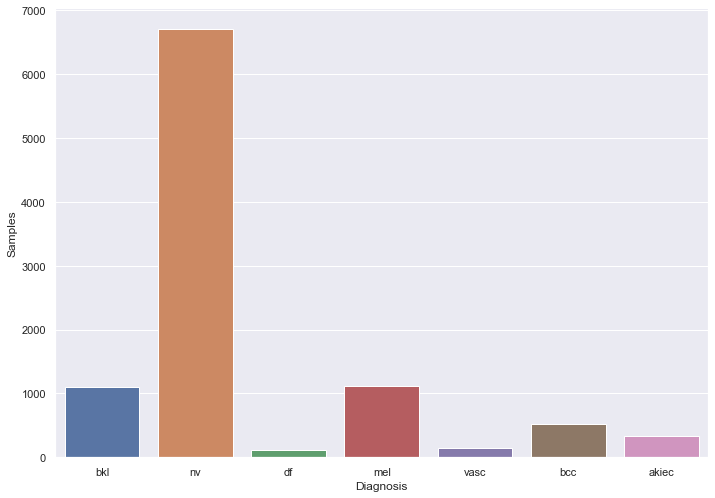

In [93]:
g = sns.barplot(x="dx", y="nums", data=df)
g.set(xlabel="Diagnosis", ylabel="Samples")
#here either add legend, or figure description for map 

Age balance - male female ages 

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Age (years)')]

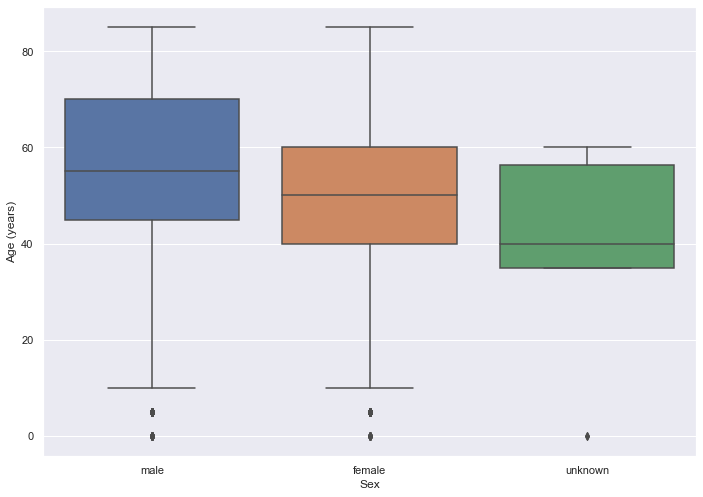

In [94]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

g = sns.boxplot(x="sex", y="age", data=df)
g.set(xlabel="Sex", ylabel="Age (years)")

Average incidence age for dx 

[Text(0.5, 0, 'Diagnosis'), Text(0, 0.5, 'Age (years)')]

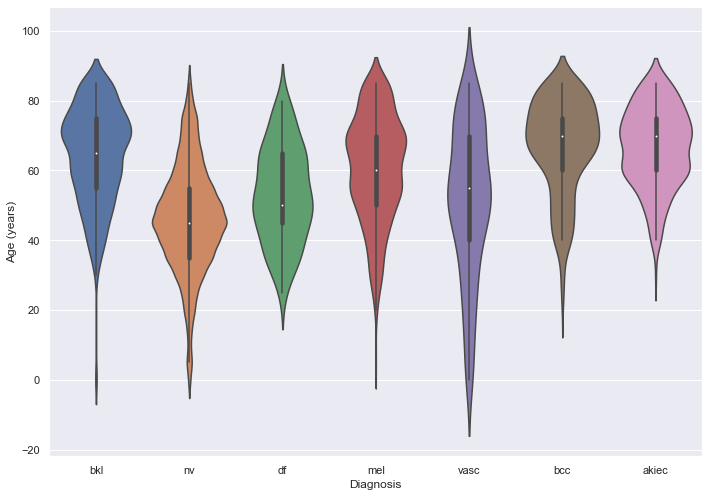

In [95]:
g = sns.violinplot(x="dx", y="age", data=df)
g.set(xlabel="Diagnosis", ylabel="Age (years)")

Localization of condition

In [96]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

c = 0 
balance = {}
for d in df["localization"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)

balance = dict(sorted(balance.items(), key=lambda item: item[1], reverse=True))
balance

10015


{'back': 2192,
 'lower extremity': 2077,
 'trunk': 1404,
 'upper extremity': 1118,
 'abdomen': 1022,
 'face': 745,
 'chest': 407,
 'foot': 319,
 'unknown': 234,
 'neck': 168,
 'scalp': 128,
 'hand': 90,
 'ear': 56,
 'genital': 48,
 'acral': 7}

[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Samples')]

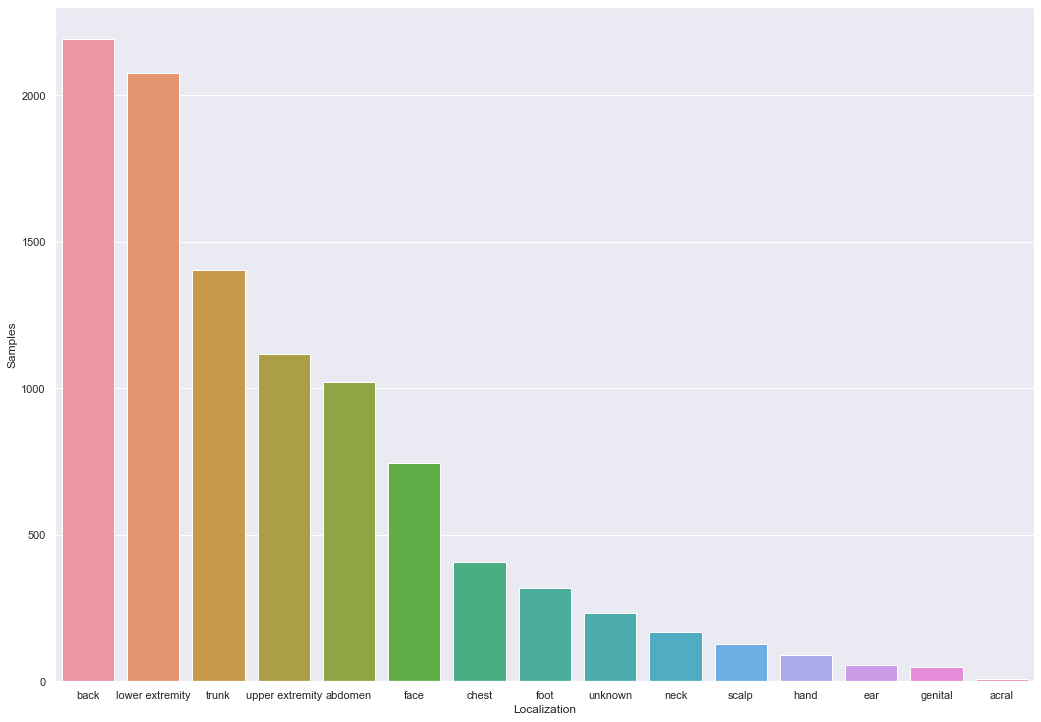

In [97]:
dx  = []
nums = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums

sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
g = sns.barplot(x="dx", y="nums", data=df)
g.set(xlabel="Localization", ylabel="Samples")

Histology distrib 

In [98]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
balance = {}
for d in df["dx_type"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
balance

{'histo': 5340, 'consensus': 902, 'confocal': 69, 'follow_up': 3704}

[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Samples')]

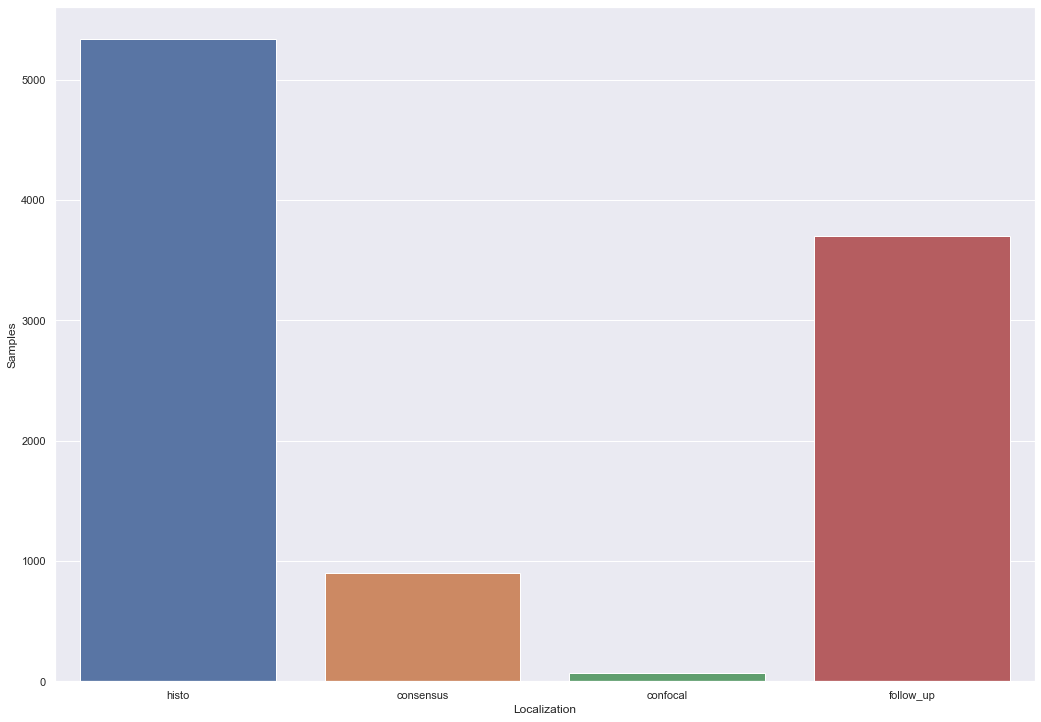

In [99]:
hx  = []
nums = []
for d in balance:
    hx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["hx"] = hx
df["nums"] = nums
g = sns.barplot(x="hx", y="nums", data=df)
g.set(xlabel="Localization", ylabel="Samples")

In [100]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Age (years)')]

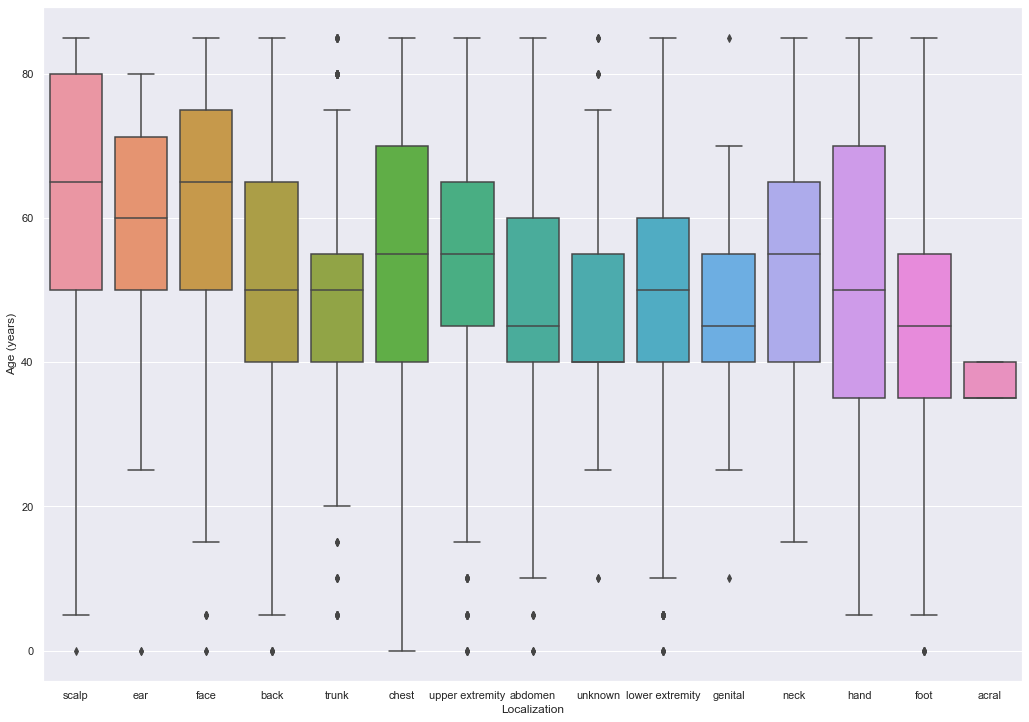

In [101]:
#age vs localization 
g = sns.boxplot(x="localization", y="age", data=df)
sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
g.set(xlabel="Localization", ylabel="Age (years)")

In [102]:
#number by diagnosis by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["dx"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1

In [103]:
m_balance

{'bkl': 626,
 'nv': 3421,
 'df': 63,
 'mel': 689,
 'vasc': 69,
 'bcc': 317,
 'akiec': 221}

In [104]:
ndf = pd.DataFrame()
sexes = []
dxs = []
amounts = []

for d in m_balance:
    sexes.append("male")
    dxs.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    dxs.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["dx"] = dxs 
ndf["nums"] = amounts 
ndf

,sex,dx,nums
0,male,bkl,626
1,male,nv,3421
2,male,df,63
3,male,mel,689
4,male,vasc,69
5,male,bcc,317
6,male,akiec,221
7,female,bkl,473
8,female,df,52
9,female,nv,3284


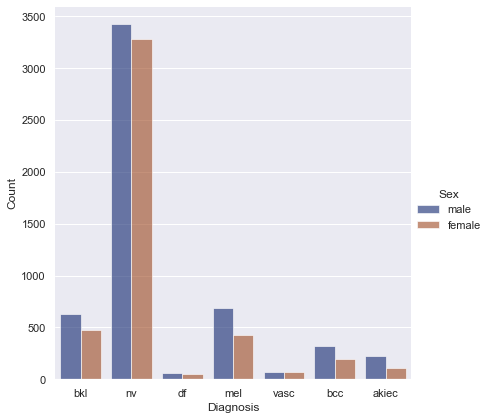

In [105]:
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="nums", hue="sex",
     palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Sex")
except:
    pass

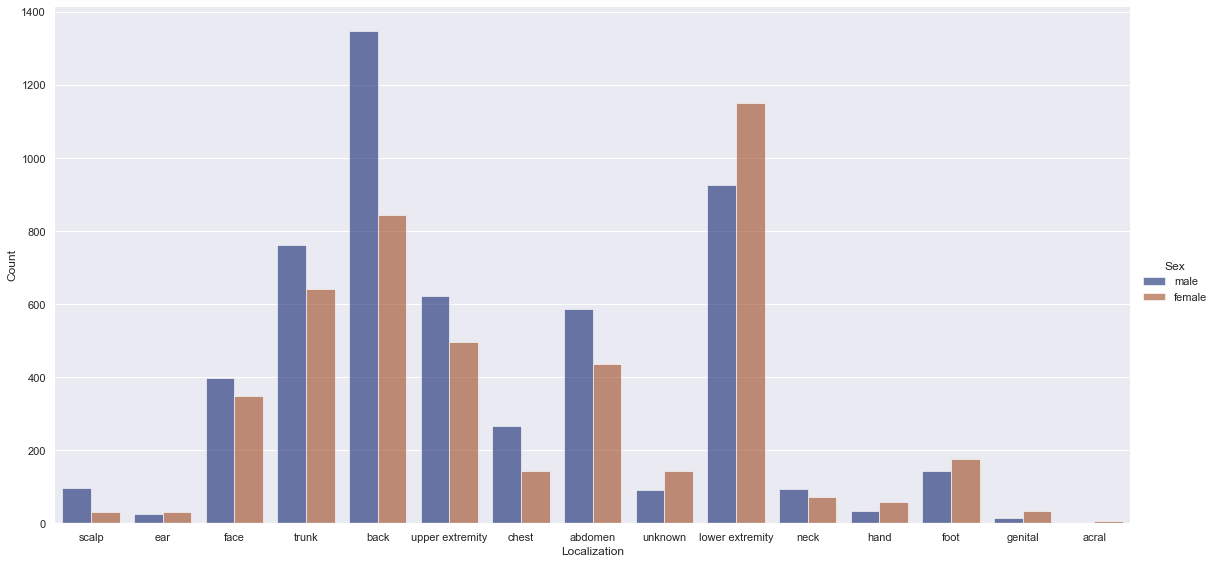

In [106]:
#number by localization by sex 
#number by diagnosis by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["localization"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1
m_balance
ndf = pd.DataFrame()
sexes = []
ls = []
amounts = []

for d in m_balance:
    sexes.append("male")
    ls.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    ls.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["localization"] = ls
ndf["nums"] = amounts 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="localization", y="nums", hue="sex",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Localization", "Count")
    g.legend.set_title("Sex")
except:
    pass

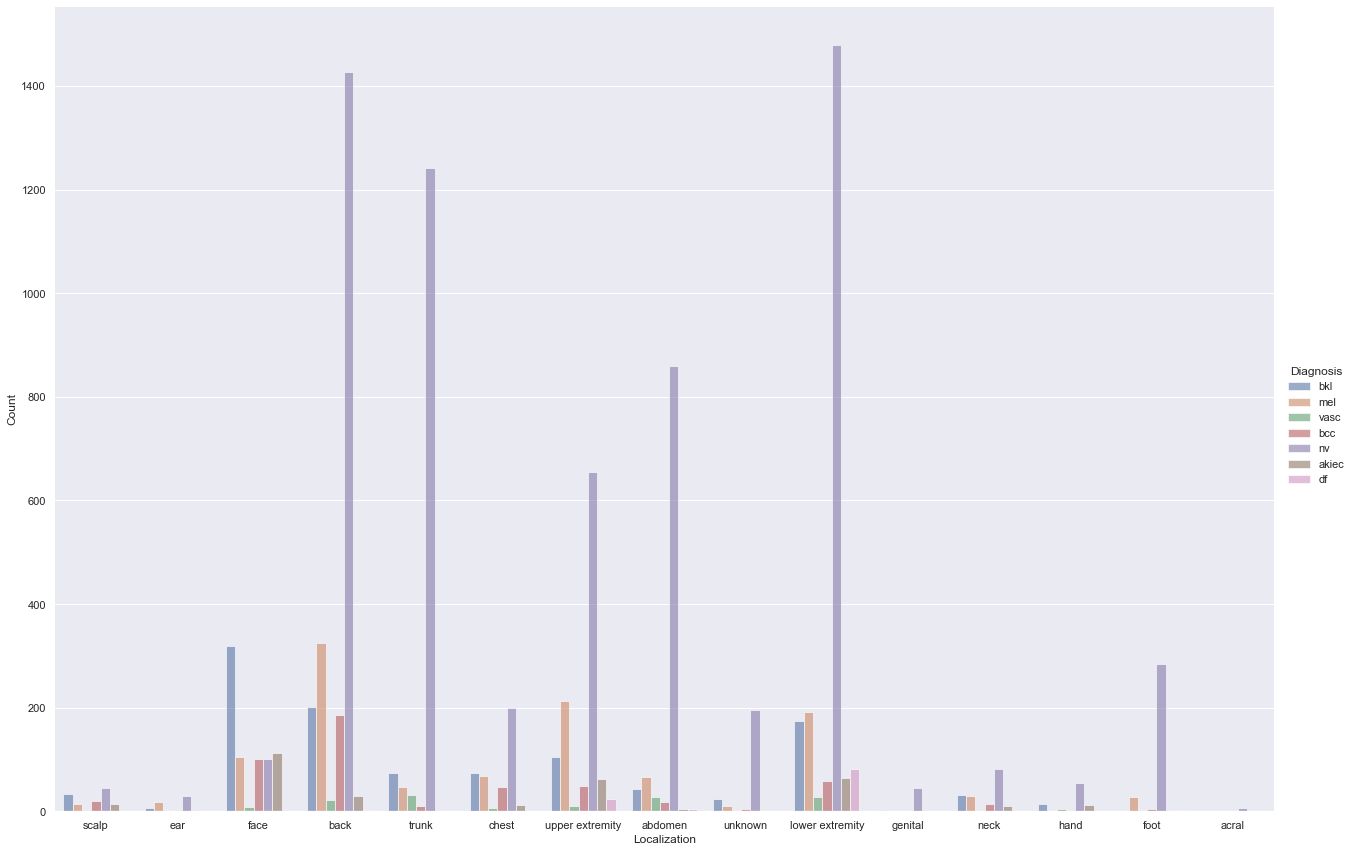

In [107]:
# localization by diagnosis type
balance = {} # locatization -> dx: count

for l,d in zip(list(df["localization"]), list(df["dx"])):
    if l not in balance:
        balance[l] = {}
    if d not in balance[l]:
        balance[l][d] = 0 
    balance[l][d] += 1

ls = []
dxs = []
count = []
for l in balance:
    for dx in balance[l]:
        dxs.append(dx)
        ls.append(l)
        count.append(balance[l][dx])

ndf = pd.DataFrame()
ndf["dx"] = dxs
ndf["localization"] = ls
ndf["count"] = count 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="localization", y="count", hue="dx",
      alpha=.6, height=12, aspect =1.5,
    )
    g.despine(left=True)
    g.set_axis_labels("Localization", "Count")
    g.legend.set_title("Diagnosis")
except:
    pass

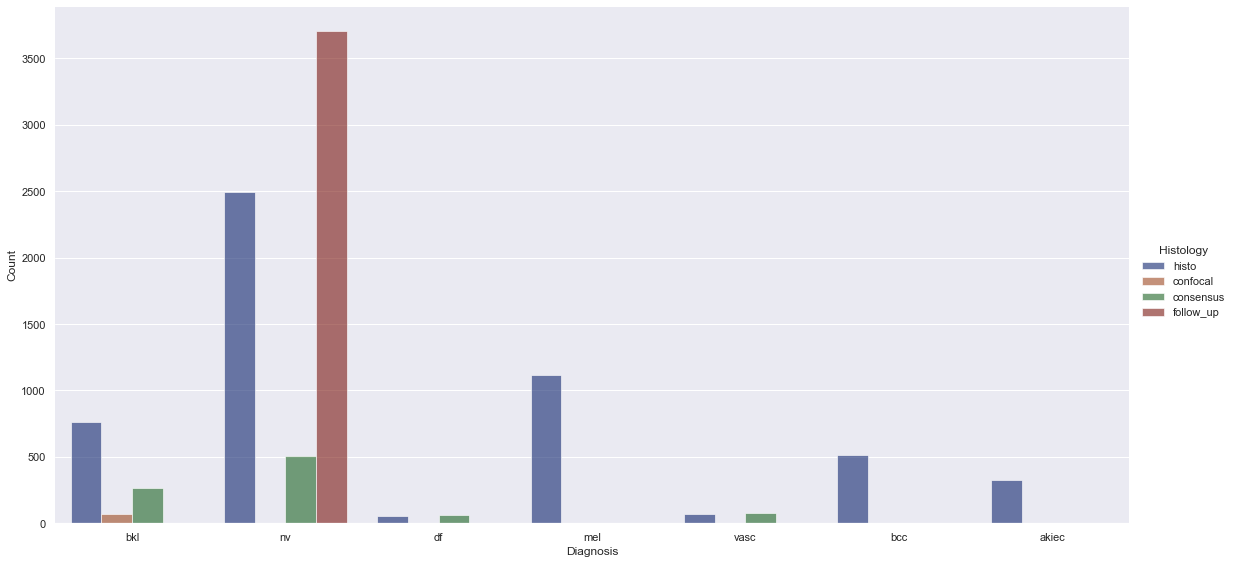

In [108]:
histo = {}
for d, h in zip(list(df["dx"]), list(df["dx_type"])):
    if d not in histo: 
        histo[d] = {}
    if h not in histo[d]:
        histo[d][h] = 0 
    histo[d][h] += 1 
histo

dx = []
hx = []
count = []
for d in histo:
    for h in histo[d]:
        dx.append(d)
        hx.append(h)
        count.append(histo[d][h])

ndf = pd.DataFrame()
ndf["dx"] = dx
ndf["hx"] = hx
ndf["count"] = count 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="count", hue="hx",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Histology")
except:
    pass

Need to do localization by diagnosis type 
- segment before 
- ask Wayner how to proceed for multimodal learning
- ask Wayner how to do transfer learning 
- week 7 transfer learning 

Actual image EDA 

In [109]:
import os 
from tqdm import tqdm 
import numpy as np 
from PIL import Image


In [110]:
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [111]:
sds = ["./HAM10000/HAM10000_images_part_1/", "./HAM10000/HAM10000_images_part_2/"]
hs = []
ws = []
for sd in sds:
    filelist = [sd + f for f in os.listdir(sd)]
    for file in tqdm(filelist):
        h, w  = get_dims(file)
        hs.append(h)
        ws.append(w)


 18%|█▊        | 885/5000 [00:05<00:26, 152.48it/s]


KeyboardInterrupt: 

600 450


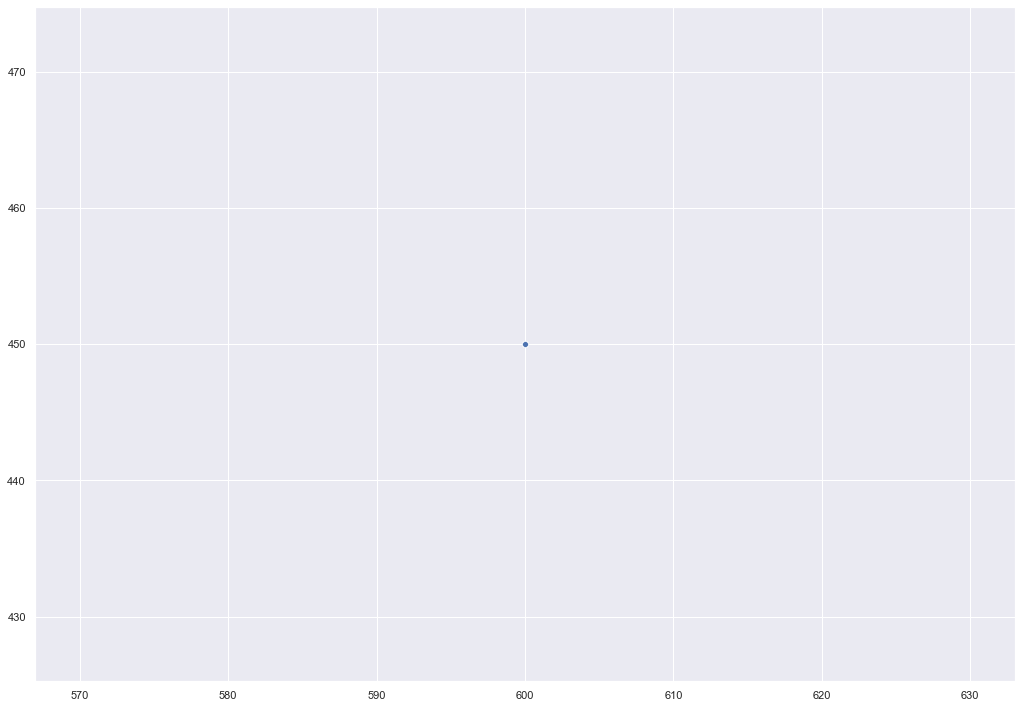

In [ ]:
g = sns.scatterplot(x=ws, y=hs)
print(ws[0], hs[0])
# so all images are 600 x 450

In [112]:
#randomly sample several images to view

sds = ["./HAM10000/HAM10000_images_part_1/", "./HAM10000/HAM10000_images_part_2/"]
files = []
for sd in sds:
    for f in tqdm(os.listdir(sd)):
        files.append(sd + f)


100%|██████████| 5015/5015 [00:00<00:00, 2457006.72it/s]


In [113]:
sample_num = 10 
samples = []
for i in range(sample_num):
    samples.append(int(random()*len(files)))
for i in range(len(samples)):
    samples[i] = files[samples[i]]

In [114]:
for file in samples:
    im = Image.open(file)
    im.show()

-Look at the ways in which people are evaluating unbalanced datasets
just change the evaluation metric to fit the problem you are trying to solve 

In [137]:
#evaluate the size of the white regions 
dir = "HAM10000/HAM10000_segmentations_lesion_tschandl/"
i = 0 
files = []
for f in tqdm(os.listdir(dir)):
       files.append(dir+f)
#select 100 random files 
rfs = []
for i in range(100):
       rfs.append(files[int(random()*len(files))])
sizes = []
for f in tqdm(rfs):
       img = cv.imread(f)
       sizes.append(find_region_size(img))

100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


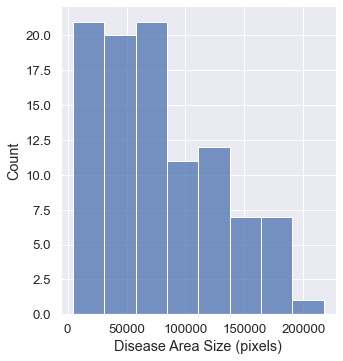

In [138]:
g = sns.displot(data=sizes)
g.set_axis_labels("Disease Area Size (pixels)", "Count")


In [139]:
def find_region_size(img):
    #start in the middle of the image (x, y)
    point = (300, 225)
    #if point is not white, traverse the image until the first while pixel is found
    if not all(img[point[1], point[0]] == [255, 255, 255]):
        for x in range(0, 600):
            for y in range(0, 450):
                if all(img[y, x] == [255, 255, 255]):
                    point = (x, y)
                    break 
    #just bfs around while the pixels are still white
    queue = []
    queue.append(point)
    visited = set()
    while(len(queue) > 0 ):
        #visit pixel if it is unvisted, and add neighbors 
        pixel = queue.pop(0)
        if pixel not in visited:
            x_n = [-1,0,1]
            y_n = [-1,0,1]
            #visit all the neighbors and add them to the queue
            for xn in x_n:
                for yn in y_n:
                    npixel = (pixel[0] + xn, pixel[1] + yn)
                    #if it is not visited and white and within the bounds of the image
                    #img[y,x]
                    if npixel not in visited  and 0 <= npixel[0] < 600 and 0 <= npixel[1] < 450 and all(img[npixel[1], npixel[0]] == [255, 255, 255]):
                        queue.append(npixel)
        visited.add(pixel)
    return len(visited)

In [140]:
#disease area size by classification 
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
dxs = df["dx"].unique()

ldxs = {}
sizes = []

In [141]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [142]:
#get 20 samples for each image
for dx, group in df.groupby("dx"):
    ldxs[dx] = []
    images = list(group["image_id"])
    np.random.shuffle(images)
    for i in range(20):
        ldxs[dx].append(images[i])

In [143]:
dxs = []
sizes = []
for dx in ldxs:
    for f in tqdm(ldxs[dx]):
        img = cv.imread(dir + f+"_segmentation.png")
        sizes.append(find_region_size(img))
        dxs.append(dx)

100%|██████████| 20/20 [00:11<00:00,  1.80it/s]


[Text(0.5, 0, 'Disease'), Text(0, 0.5, 'Area Size (pixels)')]

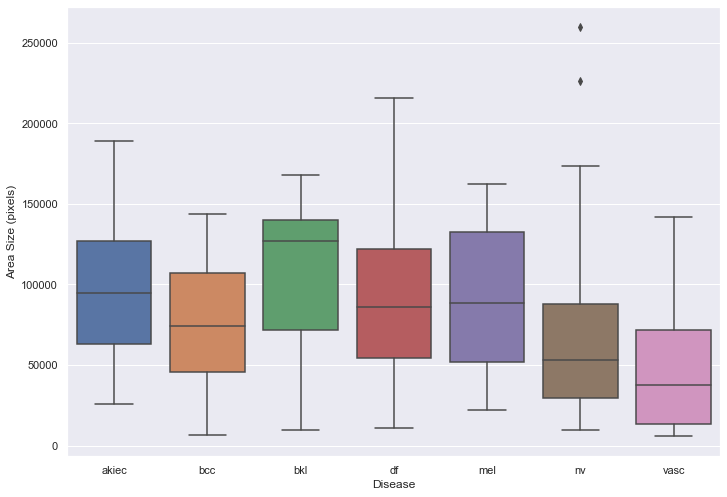

In [144]:
ndf = pd.DataFrame()
ndf["dx"] = dxs
ndf["sizes"] = sizes
sns.set(font_scale=1, rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(x="dx", y="sizes", data=ndf)
g.set(xlabel="Disease", ylabel="Area Size (pixels)")




In [145]:
# do this same analysis by localization, to understand if different diseases are larger/smaller

lcs = {}
sizes = []

#get 20 samples for each image
for lc, group in df.groupby("localization"):
    lcs[lc] = []
    images = list(group["image_id"])
    np.random.shuffle(images)
    for i in range(20):
        if len(images) > 20: 
            lcs[lc].append(images[i])
locs = []
sizes = []
for lc in lcs:
    for f in tqdm(lcs[lc]):
        img = cv.imread(dir + f+"_segmentation.png")
        sizes.append(find_region_size(img))
        locs.append(lc)

100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
0it [00:00, ?it/s]
100%|██████████| 20/20 [00:10<00:00,  1.82it/s]


[Text(0.5, 0, 'Disease Localization'), Text(0, 0.5, 'Area Size (pixels)')]

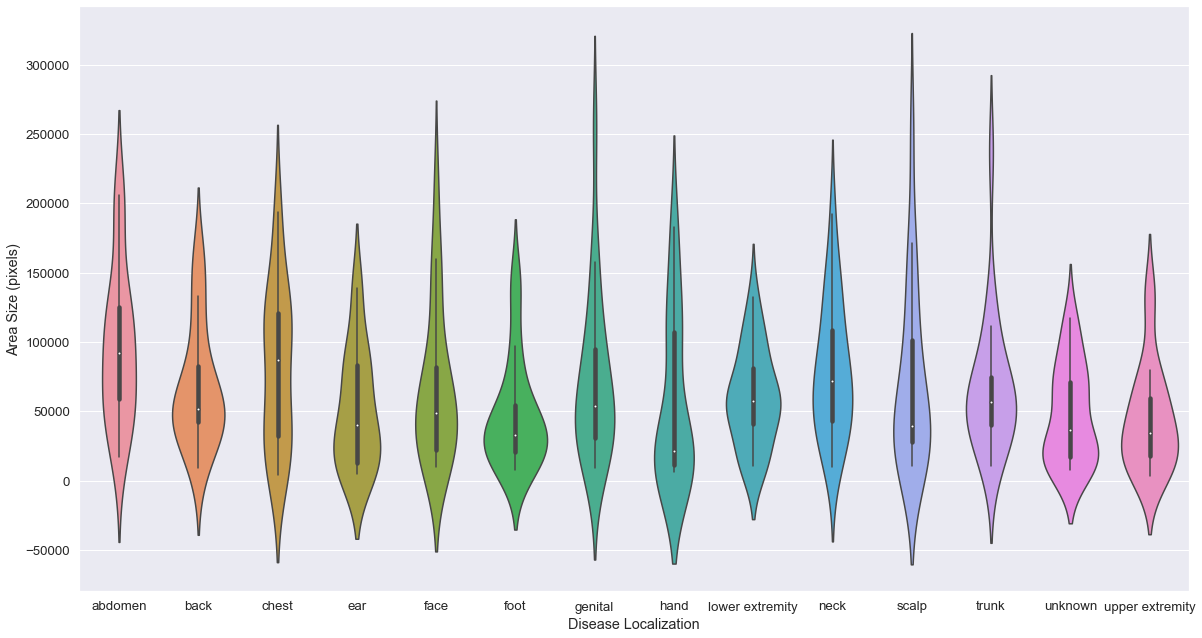

In [147]:
ndf = pd.DataFrame()
ndf["localization"] = locs
ndf["sizes"] = sizes
sns.set(font_scale=1.2, rc={'figure.figsize':(1.7*11.7,1.3*8.27)})
g = sns.violinplot(x="localization", y="sizes", data=ndf)
g.set(xlabel="Disease Localization", ylabel="Area Size (pixels)")


